# Retirado de:

* https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_iris.html#sphx-glr-auto-examples-cluster-plot-cluster-iris-py

In [9]:
%matplotlib inline


# K-means Clustering

The plots display firstly what a K-means algorithm would yield
using three clusters. It is then shown what the effect of a bad
initialization is on the classification process:
By setting n_init to only 1 (default is 10), the amount of
times that the algorithm will be run with different centroid
seeds is reduced.
The next plot displays what using eight clusters would deliver
and finally the ground truth.


In [10]:
from sklearn.metrics import silhouette_score
metrics = []

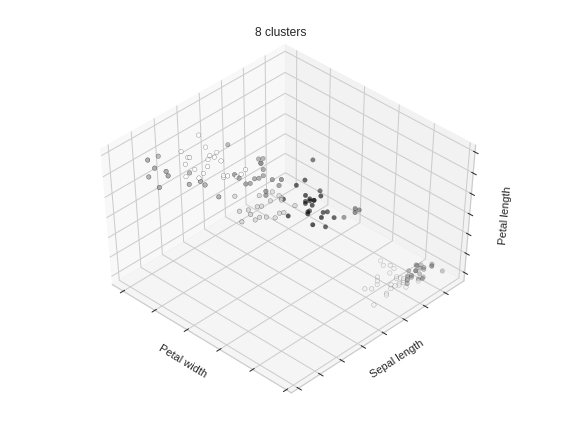

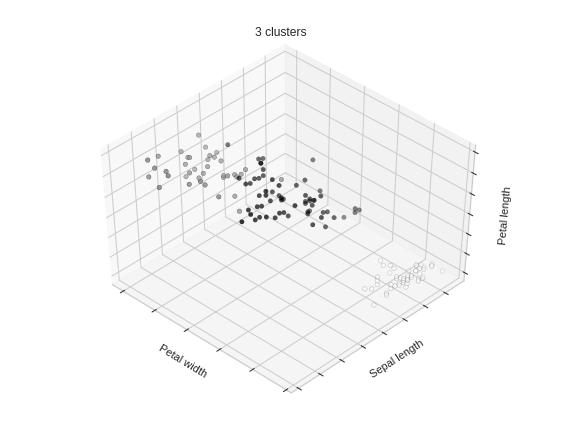

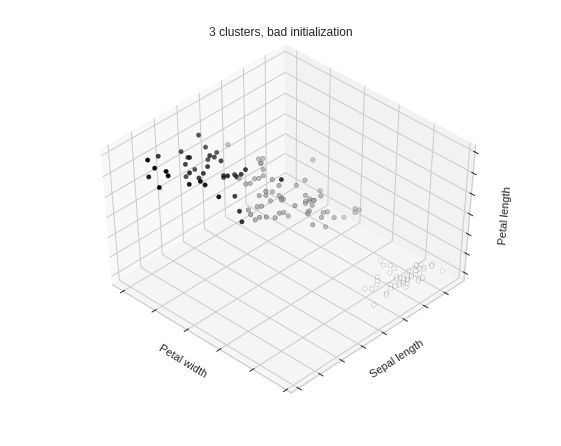

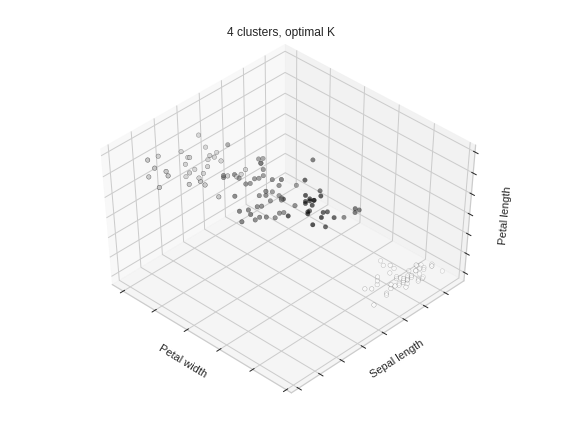

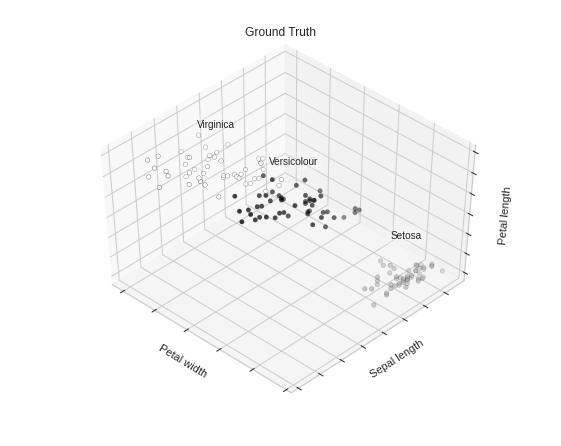

In [11]:
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(5)

iris = datasets.load_iris()

X = iris.data
y = iris.target

estimators = [
    ("k_means_iris_8", KMeans(n_clusters=8)),
    ("k_means_iris_3", KMeans(n_clusters=3)),
    ("k_means_iris_bad_init", KMeans(n_clusters=3, n_init=1, init="random")),
    ("k_means_iris_4_optimal_K", KMeans(n_clusters=4))
]

fignum = 1
titles = ["8 clusters", "3 clusters", "3 clusters, bad initialization", "4 clusters, optimal K"]

for name, est in estimators:
    fig = plt.figure(fignum, figsize=(8, 6))
    ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
    est.fit(X),
    labels = est.labels_
    label = est.predict(X)
    metrics.append(silhouette_score(X, label))

    ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=labels.astype(float), edgecolor="k")

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel("Petal width")
    ax.set_ylabel("Sepal length")
    ax.set_zlabel("Petal length")
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)

for name, label in [("Setosa", 0), ("Versicolour", 1), ("Virginica", 2)]:
    ax.text3D(
        X[y == label, 3].mean(),
        X[y == label, 0].mean(),
        X[y == label, 2].mean() + 2,
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.2, edgecolor="w", facecolor="w"),
    )
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor="k")

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel("Petal width")
ax.set_ylabel("Sepal length")
ax.set_zlabel("Petal length")
ax.set_title("Ground Truth")
ax.dist = 12

fig.show()

# Exercício (Parte I):


1.  Adaptar o código acima para  exibir o valor da métrica silhueta nos 3 primeiros plots.
  * Sobre o score da silhueta: https://towardsdatascience.com/silhouette-coefficient-validating-clustering-techniques-e976bb81d10c
1. Explicar o que a métrica indica.
1. Interpretar os gráficos segundo o valor da silhueta
1. Plotar o gráfico Elbow e avaliar o melhor valor de K
  1. O valor condiz com a quantidade de classes original?




# **2. *Silhouette Coefficient***
### É uma métrica para a qualidade do ajuste de um modelo de clustering. É um valor no intervalo [-1, 1].
*   ### 1: Significa que os clusters estão bem separados, i.e, podem ser destinguidos facilmente;
*   ### 0: Significa que os clusters indiferem, i.e, a distância entre eles não é significativa;
*   ### -1: Significa que os clusters estão distribuídos de forma errada.

# **3. Interpretrando as Métricas dos Modelos**
### Para o modelo com 8 clusters, é possível notar os clusters não estão bem separados e é bem difícil de distinguir cada um separadamente, por isso um valor de silhueta tão baixo.

### Para os modelos com 3 clusters, vemos que o valor é um pouco maior. Isso se da porque os dados realmente estão divididos 3 classes. Entretanto, não é o valor ótimo pois alguns dados estão em classes incorretas.

In [12]:
for idx, (name, model) in enumerate(estimators):
  print("{} = {}\n".format(name, metrics[idx]))

k_means_iris_8 = 0.35974549238457626

k_means_iris_3 = 0.5528190123564095

k_means_iris_bad_init = 0.551191604619592

k_means_iris_4_optimal_K = 0.4974551890173751



# **4. Plotando o gráfico Elbow**

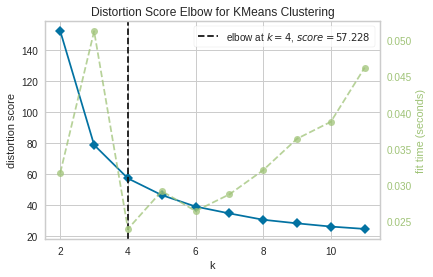

In [13]:
from yellowbrick.cluster import KElbowVisualizer

modelElbow = KMeans()
elbowMethod = KElbowVisualizer(modelElbow, k=(2, 12))

elbowMethod.fit(X)
elbowMethod.show()

### Não condiz com o valor real de classes, e podemos interpretar esse valor de acordo com o gráfico de distribuição feito acima.

# Exercício (Parte II):

1. Fazer uma busca manual dos melhores parâmetros do K-means.
  1. Considerar os parâmetros: n_clusters (2 a 10), init (todos os valores possíveis), algorithm (full ou elkan).
  1. Fizemos uma tarefa parecida no notebook sobre KNN.
  Considerar os melhores parâmetros segundo o melhor valor de silhueta.
2. Exiba os melhores parâmetros encontrados e seu valor de silhueta.


# **1. Buscando os melhores parâmetros**

In [14]:
models = ["model_kmeans_full", "model_kmeans_elkan", "model_random_full", "model_random_elkan"]
metrics_testing = []
model_idx, max_silhouette = None, -1

In [15]:
for K in range(2, 11):

  # ajustando modelo 1
  model_kmeans_full = KMeans(n_clusters=K, init="k-means++", algorithm="full")
  model_kmeans_full.fit(X)
  # calculando a silhueta 1
  label_1 = model_kmeans_full.predict(X)
  metrics_testing.append(silhouette_score(X, label_1))

  # ajustando modelo 2
  model_kmeans_elkan = KMeans(n_clusters=K, init="k-means++", algorithm="elkan")
  model_kmeans_elkan.fit(X)
  # calculando a silhueta 2
  label_2 = model_kmeans_elkan.predict(X)
  metrics_testing.append(silhouette_score(X, label_2))

  # ajustando modelo 3
  model_random_full = KMeans(n_clusters=K, init="random", algorithm="full")
  model_random_full.fit(X)
  # calculando a silhueta 3
  label_3 = model_random_full.predict(X)
  metrics_testing.append(silhouette_score(X, label_3))

  # ajustando modelo 4
  model_random_elkan = KMeans(n_clusters=K, init="random",  algorithm="elkan")
  model_random_elkan.fit(X)
  # calculando a silhueta 3
  label_4 = model_random_elkan.predict(X)
  metrics_testing.append(silhouette_score(X, label_4))

  if max(metrics_testing) > max_silhouette:
    model_idx = metrics_testing.index(max(metrics_testing))
    optimal_K = K
    max_silhouette = max(metrics_testing)

  metrics_testing.clear()

# **2. O modelo mais ajustado**

In [16]:
print("O modelo com melhores parâmetros de ajuste é:\nmodel = {}\nK = {}\nmax_silhouette = {}".format(models[model_idx], optimal_K, max_silhouette))

O modelo com melhores parâmetros de ajuste é:
model = model_kmeans_full
K = 2
max_silhouette = 0.6810461692117462
